In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [55]:
import os

# Specify the directory path
directory = "../final"

# Get the list of file names in the directory
file_list = os.listdir(directory)

In [56]:
file_list

['Llama-2-70b-chat-hf_results.json',
 'Mixtral-8x7B-Instruct-v0.1_results.json',
 'gpt-4-0125-preview_results.json',
 'Mistral-7B-Instruct-v0.2_results.json',
 'gpt-3.5-turbo-0125_results.json',
 'Llama-2-7b-chat-hf_results.json',
 'Llama-2-13b-chat-hf_results.json']

In [63]:
file = file_list[2]

In [64]:
file_name = directory+"/"+ file

In [65]:
df = pd.read_json(file_name,orient='records',lines=True)

df.head(5)

,id,prediction,gpt4_eval,gpt4_reason,mistral_eval,mistral_reason,exact_match,BLEU,BERTscore,BLEURT,human_eval,BLEURT_norm,haiku_eval,haiku_reason,qwen_eval,qwen_reason,yi_eval,yi_reason,mistral2_eval,mistral2_reason
0,0,"Yes, Scott Derrickson and Ed Wood were both of...",1,The prediction states that both Scott Derricks...,1,Both Scott Derrickson and Ed Wood are identifi...,0,0.000000,0.817122,-2.088651,1,0.229393,1,The model output and ground truth both state t...,1,The model output directly answers the question...,1,The model output states that Scott Derrickson ...,1,The model output states that Scott Derrickson ...
1,1,The woman who portrayed Corliss Archer in the ...,0,The prediction states all government positions...,0,The prediction is incorrect because it states ...,0,0.000000,0.807651,-1.810892,1,0.382763,1,The model output correctly states that Shirley...,1,The model output correctly identifies Shirley ...,1,The model output correctly identifies Shirley ...,1,The model output mentions that Shirley Temple ...
2,2,The science fantasy young adult series you're ...,1,The prediction accurately identifies 'Animorph...,1,The prediction correctly identifies the series...,0,0.000000,0.822848,-2.063114,1,0.243494,1,The model output accurately captures the key f...,1,The model output correctly identifies the seri...,1,The model output correctly identifies the scie...,1,"The model output correctly identifies the ""Ani..."
3,3,"No, the Laleli Mosque and the Esma Sultan Mans...",1,The prediction clearly states that the Laleli ...,1,The prediction correctly states that the Lalel...,0,0.000000,0.800274,-1.183207,1,0.729352,1,The model output clearly states that the Lalel...,1,The model output correctly identifies that the...,0,The model output states that the Laleli Mosque...,1,The model output states that the Laleli Mosque...
4,4,"The director of the romantic comedy ""Big Stone...",1,The prediction correctly identifies Adriana Tr...,1,The prediction correctly identifies that Adria...,0,0.185567,0.865756,-1.159232,1,0.742590,1,The model output accurately captures the key i...,1,The model output correctly identifies Adriana ...,1,The model output correctly identifies the dire...,1,"The model output states that Adriana Trigiani,..."


In [45]:
evals = df[['gpt4_eval','mistral_eval','qwen_eval','yi_eval','mistral2_eval','exact_match', 'BLEU', 'BERTscore', 'BLEURT','human_eval']]

In [46]:
evals.head()

,gpt4_eval,mistral_eval,qwen_eval,yi_eval,mistral2_eval,exact_match,BLEU,BERTscore,BLEURT,human_eval
0,1,1,1,1,1,0,0.000000,0.825867,-2.127254,1
1,0,0,0,0,0,0,0.000000,0.792158,-1.690657,0
2,1,1,1,1,1,0,0.000000,0.819614,-1.576494,1
3,1,1,1,0,1,0,0.000000,0.803214,-1.139069,1
4,1,1,1,1,1,0,0.185567,0.857462,-1.051250,1


In [212]:
correlation_matrix = evals[evals.columns].corr(method='pearson')

In [213]:
correlation_matrix[:]['human_eval']

gpt4_eval        0.789205
mistral_eval     0.593856
qwen_eval        0.480129
yi_eval          0.606478
mistral2_eval    0.609750
exact_match           NaN
BLEU             0.068008
BERTscore        0.158968
BLEURT           0.023073
human_eval       1.000000
Name: human_eval, dtype: float64

In [10]:
gpt_eval = np.array([0.743419,0.738802,0.793580,0.751744,0.725542,0.636820,0.789205])
mistral_eval = np.array([0.505263,0.634739,0.720000,0.593856,0.793580,0.702259,0.666667])
qwen_eval = np.array([0.652863,0.802443,0.790569,0.480129,0.687836,0.784284,0.682540])
yi_eval = np.array([0.811708,0.793580,0.673781,0.606478,0.731147,0.641139,0.628619])
haiku_eval = np.array([0.652863,0.710669,0.480129,0.687836,0.489912,0.832050])
llama3_eval = np.array([0.652863, 0.881780,0.785355,0.606478,0.731147,0.833308,0.748455])
NH2_eval = np.array([0.807967,0.785355,0.825723,0.572561,0.778611,0.608956,0.77829])
NH2_Yi = np.array([0.811708,0.793580,0.673781,0.606478,0.731147,0.641139,0.628619])

In [374]:
print("VARIANCE:")
print(f'GPT: {np.var(gpt_eval)*100}')
print(f'Mixtral: {np.var(mistral_eval)*100}')
print(f'Qwen: {np.var(qwen_eval)*100}')
print(f'Yi: {np.var(yi_eval)*100}')
print(f'Haiku: {np.var(haiku_eval)*100}')
print(f'Llama-3: {np.var(llama3_eval)*100}')

VARIANCE:
GPT: 0.23282897486938756
Mixtral: 0.746124082195918
Qwen: 1.0966523002204085
Yi: 0.5739067573387754
Haiku: 1.5397667221805555
Llama-3: 0.7990293902775515


In [382]:
print("STD DEV:")
print(f'GPT: {np.std(gpt_eval)*100}')
print(f'Mixtral: {np.std(mistral_eval)*100}')
print(f'Qwen: {np.std(qwen_eval)*100}')
print(f'Yi: {np.std(yi_eval)*100}')
print(f'Haiku: {np.std(haiku_eval)*100}')
print(f'Llama-3: {np.std(llama3_eval)*100}')

STD DEV:
GPT: 4.825235485128032
Mixtral: 8.637847429747286
Qwen: 10.472116788025279
Yi: 7.575663385729168
Haiku: 12.40873370727471
Llama-3: 8.938844389950814


In [380]:
print("MEAN:")
print(f'GPT: {np.mean(gpt_eval)*100}')
print(f'Mixtral: {np.mean(mistral_eval)*100}')
print(f'Qwen: {np.mean(qwen_eval)*100}')
print(f'Yi: {np.mean(yi_eval)*100}')
print(f'Haiku: {np.mean(haiku_eval)*100}')
print(f'Llama-3: {np.mean(llama3_eval)*100}')

MEAN:
GPT: 73.98731428571429
Mixtral: 65.94805714285714
Qwen: 69.72377142857144
Yi: 69.80645714285714
Haiku: 64.22431666666667
Llama-3: 74.84837142857143


In [434]:
print("CONFIDENCE INTERVALS:")
print(f'GPT: {2.576*(np.std(gpt_eval)*100/(70**0.5))}')
print(f'Mixtral: {2.576*(np.std(mistral_eval)*100/(70**0.5))}')
print(f'Qwen: {2.576*(np.std(qwen_eval)*100/(70**0.5))}')
print(f'Yi: {2.576*(np.std(yi_eval)*100/(70**0.5))}')
print(f'Haiku: {2.576*(np.std(haiku_eval)*100/(70**0.5))}')
print(f'Llama-3: {2.576*(np.std(llama3_eval)*100/(70**0.5))}')

CONFIDENCE INTERVALS:
GPT: 1.4856460468395007
Mixtral: 2.6595145307952346
Qwen: 3.2242693555832775
Yi: 2.3324777403888
Haiku: 3.820536061984047
Llama-3: 2.752188752688721


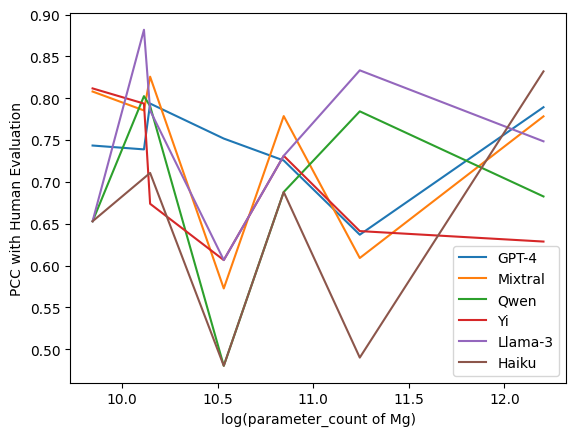

In [11]:
parameters = [7e9, 13e9, 14e9, 34e9, 70e9, 175e9, 1.6e12]
params = [math.log10(p) for p in parameters]
params_1 = [math.log10(p) for p in parameters if p != 13e9]

plt.plot(params,gpt_eval,label = 'GPT-4')
plt.plot(params,mistral_eval,label = 'Mixtral' )
plt.plot(params,qwen_eval, label = 'Qwen' )
plt.plot(params,yi_eval, label = 'Yi')
plt.plot(params,llama3_eval, label = 'Llama-3')
plt.plot(params_1,haiku_eval, label = 'Haiku')
plt.xlabel('log(parameter_count of Mg)')
plt.ylabel('PCC with Human Evaluation')
plt.legend()

In [ ]:
gpt_eval = np.array([0.743419,0.738802,0.793580,0.751744,0.725542,0.636820,0.789205])
mistral_eval = np.array([0.505263,0.634739,0.720000,0.593856,0.793580,0.702259,0.666667])
qwen_eval = np.array([0.652863,0.802443,0.790569,0.480129,0.687836,0.784284,0.682540])
yi_eval = np.array([0.811708,0.793580,0.673781,0.606478,0.731147,0.641139,0.628619])
haiku_eval = np.array([0.652863,0.710669,0.480129,0.687836,0.489912,0.832050])
llama3_eval = np.array([0.652863, 0.881780,0.785355,0.606478,0.731147,0.833308,0.748455])

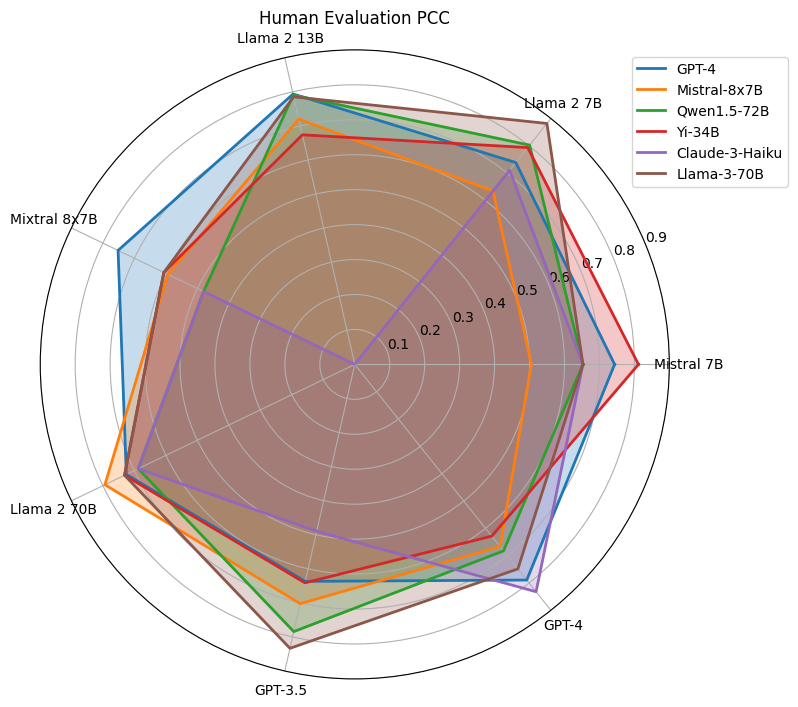

In [188]:
# Define the LLMs
llms = ['Mistral 7B', 'Llama 2 7B', 'Llama 2 13B', 'Mixtral 8x7B', 'Llama 2 70B', 'GPT-3.5', 'GPT-4']
N = len(llms)

# Define the performance measures and their corresponding values for each LLM
measures = ['GPT-4', 'Mistral-8x7B', 'Qwen1.5-72B','Yi-34B','Claude-3-Haiku','Llama-3-70B']
values = np.array([[0.743419,0.738802,0.793580,0.751744,0.725542,0.636820,0.789205],
                   #[0.807967,0.785355,0.825723,0.572561,0.778611,0.608956,0.77829],
                   [0.505263,0.634739,0.720000,0.593856,0.793580,0.702259,0.666667],
                   [0.652863,0.802443,0.790569,0.480129,0.687836,0.784284,0.682540],
                   [0.811708,0.793580,0.673781,0.606478,0.731147,0.641139,0.628619],
                   #[0.769505,0.837963,0.821736,0.67058,0.824942,0.641139,0.867806],
                   [0.652863,0.710669,0.0,0.480129,0.687836,0.489912,0.832050],
                   [0.652863, 0.881780,0.785355,0.606478,0.731147,0.833308,0.748455]])

# Define the angles for each LLM (in radians)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Close the plot
angles = np.concatenate((angles, [angles[0]]))
values = np.concatenate((values, values[:, :1]), axis=1)

# Create the polar plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(8, 8))

# Plot the data for each performance measure
for i, measure in enumerate(measures):
    ax.plot(angles, values[i], linewidth=2, label=measure)
    ax.fill(angles, values[i], alpha=0.25)

# Set the LLM labels
ax.set_thetagrids(angles[:-1] * 180/np.pi, llms)

# Set the radial axis limits
ax.set_rlim(0, 0.9)

# Add a title and legend
ax.set_title("Human Evaluation PCC")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout(pad=1.0)
plt.show()

In [411]:
context = pd.read_json('/home/sai/Programs/UIC/594/Evaluator/ablations/context_gpt.json',orient='records',lines=True)
correlation_matrix = context[['yi_eval','llama3_eval','human_eval']].corr(method='pearson')
correlation_matrix

,yi_eval,llama3_eval,human_eval
yi_eval,1.000000,0.597763,0.77829
llama3_eval,0.597763,1.000000,0.64715
human_eval,0.778290,0.647150,1.00000


In [443]:
question = pd.read_json('/home/sai/Programs/UIC/594/Evaluator/ablations/question_gpt3.json',orient='records',lines=True)

correlation_matrix = question[['yi_eval','llama3_eval','human_eval']].corr(method='pearson')
correlation_matrix

,yi_eval,llama3_eval,human_eval
yi_eval,1.000000,0.606168,0.585160
llama3_eval,0.606168,1.000000,0.667308
human_eval,0.585160,0.667308,1.000000


In [449]:
context_yi = np.array([0.644085, 0.710669, 0.755100, 0.572561, 0.631504]) # , 0.655041, 0.778290
print(np.mean(context_yi)*100)
print(np.std(context_yi)*100)

66.27838
6.369222528817785


In [450]:
question_yi = np.array([0.643603, 0.748455, 0.711512, 0.247594, 0.778611]) # , 0.585160, 0.778290
print(np.mean(question_yi)*100)
print(np.std(question_yi)*100)

62.5955
19.44729301522451


In [451]:
context_ll = np.array([0.727655, 0.756944, 0.825723, 0.402340, 0.781736])# , 0.641139, 0.647150
print(np.mean(context_ll)*100)
print(np.std(context_ll)*100)

69.88796
15.171661985768074


In [452]:
question_ll = np.array([0.657713, 0.463677, 0.682242, 0.667308, 0.523810])
print(np.mean(question_ll)*100)
print(np.std(question_ll)*100)

59.894999999999996
8.832696952347002


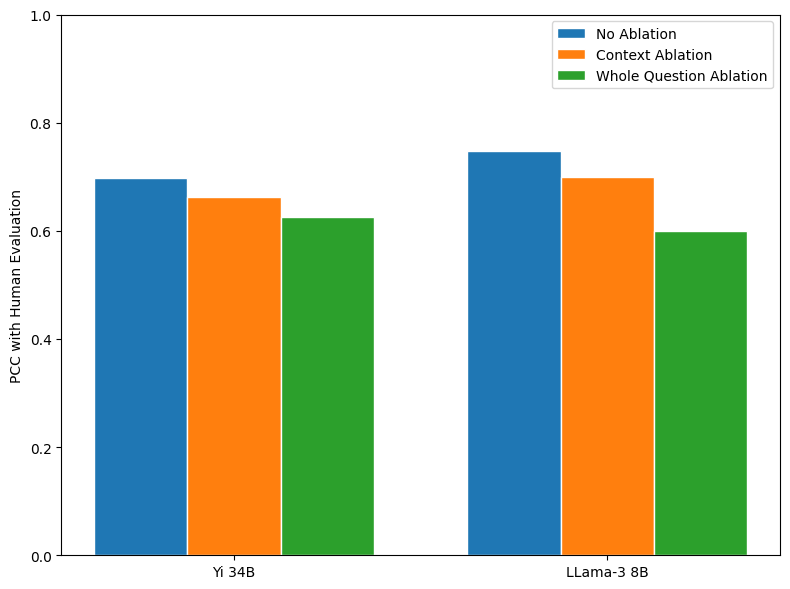

In [493]:
# Define the binary x-values and corresponding y-values for each graph
x_values = ['Yi 34B', 'LLama-3 8B']
y_values_graph1 = [0.6980, 0.7484]
y_values_graph2 = [0.6627, 0.6988]
y_values_graph3 = [0.6259, 0.5989]

# Set the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar graphs
ax.bar(r1, y_values_graph1, width=bar_width, edgecolor='white', label='No Ablation')
ax.bar(r2, y_values_graph2, width=bar_width, edgecolor='white', label='Context Ablation')
ax.bar(r3, y_values_graph3, width=bar_width, edgecolor='white', label='Whole Question Ablation')

# Add x-tick labels
ax.set_xticks([r + bar_width for r in range(len(x_values))])
ax.set_xticklabels(x_values)

# Add y-axis label and limit
ax.set_ylabel('PCC with Human Evaluation')
ax.set_ylim(0, 1)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
# confusion matrices
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['human_eval'], df['yi_eval'])

In [48]:
cm

array([[ 6,  6],
       [ 1, 57]])

In [15]:
yi = df[df['human_eval'] != df['yi_eval']]

In [21]:
print(np.array(yi['yi_reason'])[0])

The model output states that the Laleli Mosque is located in Laleli, Fatih, Istanbul, while the Esma Sultan Mansion is situated in the Ortaköy neighborhood of Istanbul. This directly contradicts the ground truth answer "no", which implies that the two locations are not in the same neighborhood.


In [22]:
print(np.array(yi['yi_reason'])[1])

The model output states that the fight song of the University of Kansas is "I'm a Jayhawk." The ground truth answer is "Kansas Song." The University of Kansas is the university with a main campus in Lawrence, Kansas, and branch campuses in the Kansas City metropolitan area. Therefore, the model output and the ground truth answer refer to the same university.

The model output does not mention the name of the fight song, but it does provide the name of another song associated with the university, "I'm a Jayhawk." This could be considered a minor discrepancy, but it does not contradict the ground truth answer.

The key meaning of the ground truth answer is that the fight song of the University of Kansas is called "Kansas Song." The model output conveys this meaning by identifying the university and providing a different song associated with it.


In [23]:
print(np.array(yi['yi_reason'])[2])

The model output states that Dirleton Castle, a medieval fortress in Dirleton, East Lothian, Scotland, borders on the south side of the Firth of Forth. The ground truth answer is Yellowcraig, a coastal area in East Lothian, south-east Scotland. The model output does not mention Yellowcraig explicitly, but it does mention that Dirleton Castle borders on the south side of the Firth of Forth. Yellowcraig is mentioned in the context as being bordered by Dirleton Castle to the north. Therefore, the model output captures the key meaning of the ground truth.


In [24]:
print(np.array(yi['yi_reason'])[3])

The model output correctly identifies the English Electric Canberra as the British first-generation jet-powered medium bomber. However, it also states that the Canberra was not used in the South West Pacific theatre of World War II, which contradicts the ground truth. The ground truth states that the Canberra was used in the South West Pacific theatre of World War II.


In [25]:
print(np.array(yi['yi_reason'])[4])

The ground truth answer is Usher, and the model output states that the singer is Mario Winans. The model output is incorrect because it does not match the ground truth. The model output does not capture the key meaning of the ground truth.


In [28]:
print(np.array(yi['prediction'])[1])

The fight song of the University of Kansas, whose main campus is in Lawrence, Kansas, and which has branch campuses in the Kansas City metropolitan area, is "I'm a Jayhawk."


In [30]:
yi

,id,prediction,gpt4_eval,gpt4_reason,mistral_eval,mistral_reason,exact_match,BLEU,BERTscore,BLEURT,human_eval,BLEURT_norm,haiku_eval,haiku_reason,qwen_eval,qwen_reason,yi_eval,yi_reason,mistral2_eval,mistral2_reason
3,3,"No, the Laleli Mosque and the Esma Sultan Mans...",1,The prediction clearly states that the Laleli ...,1,The prediction correctly states that the Lalel...,0,0.0,0.800274,-1.183207,1,0.729352,1,The model output clearly states that the Lalel...,1,The model output correctly identifies that the...,0,The model output states that the Laleli Mosque...,1,The model output states that the Laleli Mosque...
10,10,"The fight song of the University of Kansas, wh...",0,The prediction provided a specific song title ...,0,"The prediction is partially correct, but the n...",0,0.0,0.815321,-1.842575,0,0.365269,1,The model output correctly identifies the figh...,1,The model output states that the fight song of...,1,The model output states that the fight song of...,1,The model output mentions the University of Ka...
45,45,"The medieval fortress in Dirleton, East Lothia...",0,The prediction incorrectly identifies the bord...,0,The prediction is incorrect because the Firth ...,0,0.0,0.758983,-1.376127,0,0.622827,0,The model output correctly states that Dirleto...,0,"The model output states that Dirleton Castle, ...",1,"The model output states that Dirleton Castle, ...",1,The model output correctly identifies the medi...
49,49,The English Electric Canberra is the British f...,0,The prediction clarifies that the English Elec...,0,The prediction correctly identifies the Englis...,0,0.0,0.839994,-1.365671,1,0.628601,1,The model output correctly identifies the Engl...,0,"The ground truth answer is ""English Electric C...",0,The model output correctly identifies the Engl...,1,The model output correctly identifies the Engl...
67,67,"The singer is Mario Winans, whose song ""I Don'...",0,The prediction incorrectly identifies Mario Wi...,0,The prediction is incorrect. The singer who re...,0,0.0,0.804207,-2.424438,1,0.043982,1,The model output correctly identifies that the...,0,The ground truth answer is looking for the sin...,0,"The ground truth answer is Usher, and the mode...",0,The model output mentions Mario Winans and his...


In [9]:
original = pd.read_json('../results/original.json',orient='records',lines=True)

In [35]:
print(np.array(original[original['id'] == 10]['llm_context']))

['North Kansas City, Missouri: North Kansas City is a city in Clay County, Missouri, United States that despite the similarity in name to its larger counterpart, Kansas City, is an independent municipality part of the Kansas City metropolitan area.  The population was 4,208 at the 2010 census.  Originally a northern suburb across the Missouri River from Kansas City, Missouri, it is now almost completely surrounded by Kansas City, which has annexed far to the north of North Kansas City\'s northern city limits.  North Kansas City also adjoins the small municipality of Avondale.\n\nUniversity of Missouri–Kansas City: The University of Missouri–Kansas City (UMKC) is a public research university serving the greater Kansas City metropolitan area.  Located in Kansas City, Missouri, UMKC is one of four system campuses that collectively constitute the University of Missouri.  UMKC is spread across multiple locales; the main Volker Campus, home to the majority of university operations, is locate

In [75]:
df1 = pd.read_json('../ablations/reason_gpt4.json',orient='records',lines=True)

df1[['human_eval','yi_ablated_eval']].corr(method='pearson')

,human_eval,yi_ablated_eval
human_eval,1.000000,0.867806
yi_ablated_eval,0.867806,1.000000


In [179]:
yi_eval_ablated = np.array([0.769505,0.837963,0.785355,0.617977,0.870988,0.641139,0.867806])
yi_eval_ablated_2 = np.array([0.769505,0.837963,0.821736,0.67058,0.824942,0.641139,0.867806])
llama3_eval_ablated = np.array([0.599657,0.738802,0.825723,0.606478,0.731147,0.655041,0.628619])
mix_eval_ablated = np.array([0.807967,0.785355,0.825723,0.572561,0.778611,0.608956,0.77829])

In [181]:
print(np.mean(yi_eval_ablated)*100)
print(np.mean(yi_eval_ablated_2)*100)
print(np.mean(llama3_eval_ablated)*100)
print(np.mean(mix_eval_ablated)*100)

77.01047142857142
77.62387142857142
68.3638142857143
73.67804285714286


In [182]:
print(np.std(yi_eval_ablated)*100)
print(np.std(yi_eval_ablated_2)*100)
print(np.std(llama3_eval_ablated)*100)
print(np.std(mix_eval_ablated)*100)

9.586869986260863
8.115022041993528
7.777226087646374
9.420171702993398


In [176]:
df1 = pd.read_json('../ablations/reason_gpt3.json',orient='records',lines=True)

In [177]:
df1

,prediction,human_eval,yi_eval,yi_ablated_eval,mix_eval
0,"Yes, both Scott Derrickson and Ed Wood were of...",1,1,1,-1
1,The woman who portrayed Corliss Archer in the ...,1,1,1,-1
2,The science fantasy young adult series that fi...,1,1,1,-1
3,"No, the Laleli Mosque and Esma Sultan Mansion ...",1,0,1,-1
4,"The director of the romantic comedy ""Big Stone...",1,1,1,-1
...,...,...,...,...,...
65,Rose McGowan is best known for her role as Pai...,1,1,1,-1
66,Vince Phillips held the IBF (International Box...,1,1,1,-1
67,The singer who released the lead single from t...,1,1,1,-1
68,The younger brother of the episode guest stars...,0,0,0,0


In [178]:
correlation_matrix = df1[['mix_eval','human_eval']].corr(method='pearson')
correlation_matrix

,mix_eval,human_eval
mix_eval,1.000000,-0.608956
human_eval,-0.608956,1.000000


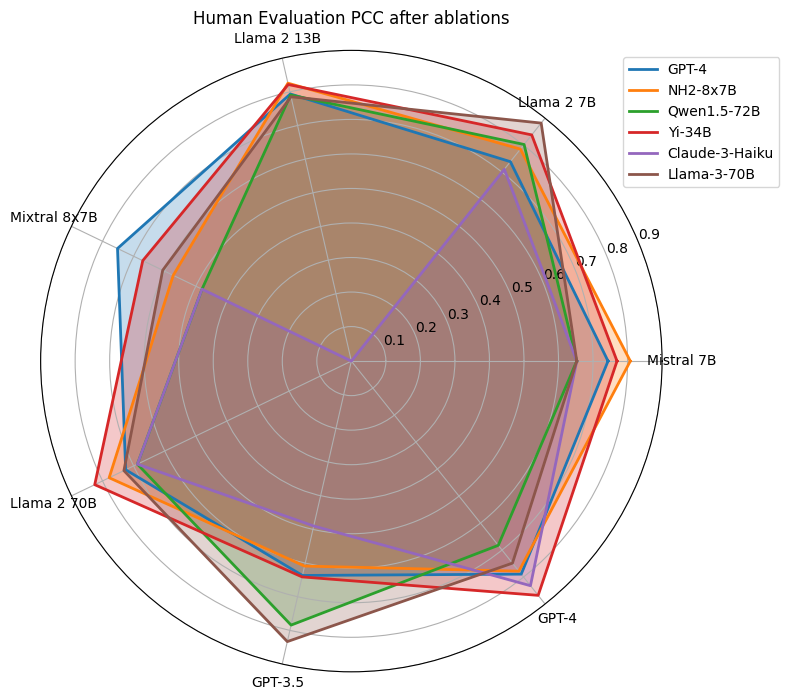

In [67]:
# Define the LLMs
llms = ['Mistral 7B', 'Llama 2 7B', 'Llama 2 13B', 'Mixtral 8x7B', 'Llama 2 70B', 'GPT-3.5', 'GPT-4']
N = len(llms)

# Define the performance measures and their corresponding values for each LLM
measures = ['GPT-4', 'NH2-8x7B', 'Qwen1.5-72B','Yi-34B','Claude-3-Haiku','Llama-3-70B']
values = np.array([[0.743419,0.738802,0.793580,0.751744,0.725542,0.636820,0.789205],
                   [0.807967,0.785355,0.825723,0.572561,0.778611,0.608956,0.77829],
                   #[0.505263,0.634739,0.720000,0.593856,0.793580,0.702259,0.666667],
                   [0.652863,0.802443,0.790569,0.480129,0.687836,0.784284,0.682540],
                   #[0.811708,0.793580,0.673781,0.606478,0.731147,0.641139,0.628619],
                   [0.769505,0.837963,0.821736,0.67058,0.824942,0.641139,0.867806],
                   [0.652863,0.710669,0.0,0.480129,0.687836,0.489912,0.832050],
                   [0.652863, 0.881780,0.785355,0.606478,0.731147,0.833308,0.748455]])

# Define the angles for each LLM (in radians)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Close the plot
angles = np.concatenate((angles, [angles[0]]))
values = np.concatenate((values, values[:, :1]), axis=1)


# Create the polar plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(8, 8))

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# Plot the data for each performance measure
for i, measure in enumerate(measures):
    ax.plot(angles, values[i], linewidth=2, label=measure)
    ax.fill(angles, values[i], alpha=0.25)

# Set the LLM labels
ax.set_thetagrids(angles[:-1] * 180/np.pi, llms)

# Set the radial axis limits
ax.set_rlim(0, 0.9)

# Add a title and legend
ax.set_title("Human Evaluation PCC after ablations")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.savefig('../../Graphs/PCC_2.png')
plt.tight_layout(pad=1.0)
plt.show()

In [66]:
df[['exact_match','BLEU','BERTscore','BLEURT_norm','human_eval']].corr(method='pearson')

,exact_match,BLEU,BERTscore,BLEURT_norm,human_eval
exact_match,NaN,NaN,NaN,NaN,NaN
BLEU,NaN,1.000000,0.400522,0.350375,0.119817
BERTscore,NaN,0.400522,1.000000,0.571814,0.325881
BLEURT_norm,NaN,0.350375,0.571814,1.000000,0.122774
human_eval,NaN,0.119817,0.325881,0.122774,1.000000


In [50]:
df = pd.read_json('../final/gpt-3.5-turbo-0125_results.json',orient='records',lines=True)

df.head(5)

,id,prediction,gpt4_eval,gpt4_reason,mistral_eval,mistral_reason,exact_match,BLEU,BERTscore,BLEURT,human_eval,BLEURT_norm,haiku_eval,haiku_reason,qwen_eval,qwen_reason,yi_eval,yi_reason,mistral2_eval,mistral2_reason
0,0,"Yes, both Scott Derrickson and Ed Wood were of...",1,The prediction accurately states that both Sco...,1,Both Scott Derrickson and Ed Wood are identifi...,0,0.000000,0.817323,-2.193113,1,0.241870,1,The model output correctly states that both Sc...,1,The model output states that both Scott Derric...,1,The model output states that both Scott Derric...,1,The model output states that both Scott Derric...
1,1,The woman who portrayed Corliss Archer in the ...,0,The prediction lists multiple government posit...,0,The prediction incorrectly states that Shirley...,0,0.000000,0.808451,-1.914925,1,0.381035,1,The model output correctly states that Shirley...,1,The model output correctly identifies Shirley ...,1,The model output correctly identifies Shirley ...,1,"The model output mentions that Shirley Temple,..."
2,2,The science fantasy young adult series that fi...,1,The prediction accurately identifies the 'Anim...,1,The prediction correctly identifies the series...,0,0.000000,0.811657,-1.614071,1,0.531538,1,The model output accurately captures the key f...,1,"The model output correctly identifies the ""Ani...",1,The model output correctly identifies the scie...,1,"The model output correctly identifies the ""Ani..."
3,3,"No, the Laleli Mosque and Esma Sultan Mansion ...",1,The prediction specifies that Laleli Mosque an...,1,The prediction correctly states that the Lalel...,0,0.000000,0.798762,-1.169890,1,0.753741,1,The model output clearly states that the Lalel...,1,The model output clearly states that the Lalel...,0,The model output states that the Laleli Mosque...,1,The model output states that the Laleli Mosque...
4,4,"The director of the romantic comedy ""Big Stone...",1,The prediction provides the exact location (Gr...,1,The prediction correctly identifies that Adria...,0,0.185567,0.865756,-1.159232,1,0.759073,1,The model output accurately captures the key i...,1,The model output correctly identifies Adriana ...,1,The model output correctly identifies the dire...,1,"The model output states that Adriana Trigiani,..."


In [51]:
df = df[df['human_eval'] != df['gpt4_eval']]

In [52]:
df.head()

,id,prediction,gpt4_eval,gpt4_reason,mistral_eval,mistral_reason,exact_match,BLEU,BERTscore,BLEURT,human_eval,BLEURT_norm,haiku_eval,haiku_reason,qwen_eval,qwen_reason,yi_eval,yi_reason,mistral2_eval,mistral2_reason
1,1,The woman who portrayed Corliss Archer in the ...,0,The prediction lists multiple government posit...,0,The prediction incorrectly states that Shirley...,0,0.0,0.808451,-1.914925,1,0.381035,1,The model output correctly states that Shirley...,1,The model output correctly identifies Shirley ...,1,The model output correctly identifies Shirley ...,1,"The model output mentions that Shirley Temple,..."
13,13,"No, Random House Tower and 888 7th Avenue are ...",1,The Language Model's explanation accurately ma...,0,The prediction correctly identifies that Rando...,0,0.0,0.808425,-1.102058,0,0.787674,1,The model output accurately captures the key f...,1,The model output correctly identifies that bot...,1,The model output explains that Random House To...,1,The model output correctly states that Random ...
25,25,"The writer of ""These Boots Are Made for Walkin...",0,The prediction includes both the writer of 'Th...,1,The prediction correctly identifies Lee Hazlew...,0,0.0,0.863303,-1.775921,1,0.450572,0,The model output correctly identifies Lee Hazl...,0,The model output correctly identifies Lee Hazl...,1,The model output correctly identifies Lee Hazl...,1,The model output correctly identifies Lee Hazl...
45,45,"Dirleton Castle, the medieval fortress in Dirl...",1,The prediction specifies that Dirleton Castle ...,1,The prediction correctly identifies the coasta...,0,0.0,0.783708,-1.392281,0,0.642489,1,The model output accurately captures the key i...,1,The model output specifies that Dirleton Castl...,1,The model output correctly identifies Dirleton...,1,The model output correctly identifies the coas...
49,49,The British first-generation jet-powered mediu...,0,The English Electric Canberra did not see serv...,1,The prediction correctly identifies the Englis...,0,0.0,0.851943,-1.069149,1,0.804137,1,The model output directly states that the Brit...,1,The model output directly states the correct a...,1,The model output states that the British first...,1,The model output states that the British first...


#### Mixtral

In [25]:

print("Who was the writer of These Boots Are Made for Walkin' and who died in 2007?")
print('''Lee Hazlewood wrote "These Boots Are Made for Walkin'." However, none of the individuals mentioned in the context died in 2007. Nancy Sinatra (born in 1940), Barry Harris (born in an unknown year), Abdul Wali (died in 2003), Jim Shoulders (died in 2007), and Lee Hazlewood (died in 2007) are all mentioned in the context.''')
print("Barton Lee Hazlewood")
print(np.array(df['gpt4_reason'])[1])

Who was the writer of These Boots Are Made for Walkin' and who died in 2007?
Lee Hazlewood wrote "These Boots Are Made for Walkin'." However, none of the individuals mentioned in the context died in 2007. Nancy Sinatra (born in 1940), Barry Harris (born in an unknown year), Abdul Wali (died in 2003), Jim Shoulders (died in 2007), and Lee Hazlewood (died in 2007) are all mentioned in the context.
Barton Lee Hazlewood
The prediction provides the full name of the writer ('Lee Hazlewood') who is the same person as 'Barton Lee Hazlewood' mentioned in the ground truth, and correctly states that he died in 2007. Both pieces of information match, indicating the prediction conveys the same information as the ground truth.


In [26]:
print(np.array(df['gpt4_reason'])[2])

The prediction states that the Russian Civil War ended in 1923, while the ground truth indicates that the war ended in October 1922. The two statements do not mean the same thing regarding the end date of the civil war.


In [27]:
print(np.array(df['gpt4_reason'])[3])

The prediction explains the concept of drifting in detail, which is the oversteering technique D1NZ is based on, matching the ground truth.


In [33]:
print(np.array(df['qwen_reason'])[2])

The model output provides a broader context for the end of the Russian Civil War, mentioning that Red control was assured in 1923 and that armed resistance in Central Asia continued until 1934. However, it does not directly state the specific end date of the civil war as October 1922, which is the key fact in the ground truth. The model output's information is not contradictory, but it does not precisely match the ground truth's specific date.


In [34]:
print(np.array(df['qwen_reason'])[3])

The model output explains the drifting technique, specifically mentioning oversteering, loss of traction, and the rear slip angle being greater than the front slip angle. It also refers to the front wheels pointing in the opposite direction, which is a characteristic of drifting. The output focuses on the technical aspects of the drifting technique, which is the core of D1NZ. The ground truth simply states "Drifting," which is the broader term for the technique that the model output describes in more detail. Therefore, the model output captures the key meaning of the ground truth.


In [35]:
print(np.array(df['llama3_reason'])[3])

The prediction correctly identifies that D1NZ is a series based on the drifting technique, which is a type of oversteering where the driver intentionally loses traction in the rear wheels while maintaining control and driving the car through a corner. This is caused when the rear slip angle is greater than the front slip angle, which can result in the front wheels pointing in the opposite direction to the turn.


In [40]:
print(np.array(df['llama3_reason'])[0])

The model output states that Alex Ferguson was the football manager who recruited David Beckham and managed Manchester United during Beckham's time at the club (1992-2003). The ground truth answer provides the entire timeframe of Alex Ferguson's management of Manchester United, which is from 1986 to 2013.

Although the model output does not provide the exact same timeframe as the ground truth, it captures the essential meaning that Alex Ferguson was the manager who recruited David Beckham and managed Manchester United during his time at the club. The model output does not contradict the ground truth in any way, and the key fact that Alex Ferguson was the manager who recruited Beckham is preserved.


#### GPT-3.5

In [47]:
print(np.array(df['llama3_reason'])[0])  # works for llama 3

The model output and ground truth both convey the same message, which is that Random House Tower and 888 7th Avenue are not used for real estate purposes. The model output provides additional context and explanations to support this claim, stating that Random House Tower is a mixed-use tower with a book publisher and luxury apartments, and 888 7th Avenue is an office skyscraper housing a real estate investment trust (REIT) but not used for real estate transactions. The ground truth answer is a simple "no", which aligns with the model output's conclusion.


In [48]:
print(np.array(df['llama3_reason'])[1]) 

The model output states that Dirleton Castle borders on the south side of Yellowcraig, which is a coastal area of forest, beach, and grassland in East Lothian. The ground truth answer is simply "Yellowcraig". The key fact expressed in the model output is that Dirleton Castle is adjacent to Yellowcraig, which aligns with the ground truth. The model output provides additional information about Yellowcraig, but this does not contradict the ground truth. The main point of the question, which is the coastal area that Dirleton Castle borders, is correctly identified as Yellowcraig in both the model output and the ground truth.


In [49]:
print(np.array(df['llama3_reason'])[2]) 

The model output states that the Australian city founded in 1838 that contains a boarding school opened by a Prime Minister of Australia and named after a school in London is Adelaide. However, the ground truth answer is Marion, South Australia. 

Although the model output is close, it is not entirely accurate. The correct answer is Marion, which is a suburb in the City of Marion in Adelaide, as mentioned in the context. The boarding school in question is Westminster School, which was opened by Prime Minister Robert Menzies in 1961 and is named after Westminster School in London.

The key fact that the model output misses is that the correct answer is Marion, not Adelaide. While Adelaide is the larger city that Marion is a part of, the question specifically asks for the city founded in 1838, which is Marion.
